In [4]:
import numpy as np
from math import exp
import random
import matplotlib.pyplot as plt
from itertools import permutations
import scipy.optimize as optimize
import functools

# Compact CLE for AR(1) process

In [5]:
def h(theta,x,y):
    return theta*x*y

def permute(X):
    ''' X : list '''
    l = X[1:-1]
    permuted = [X[0]] + random.sample(l, len(l)) + [X[-1]]
    return permuted

def permutation_distribution(theta,X):
    n = len(X)
    l = X[1:-1]
    f = [] #note: non normalized distribution
    for i in permutations(l,len(l)):
        X_pi = [X[0]] + list(i) + [X[-1]] #先頭が恒等写像
        kernel = sum([h(theta,X_pi[t-1-1],X_pi[t-1]) for t in range(2,n+1)]) - 50
        
        f.append(exp(kernel))
    return f


def conditional_likelihood(theta,X):
    f = permutation_distribution(theta,X)
    return f[0]/sum(f)

def negative_conditional_likelihood(theta,X):
    return -conditional_likelihood(theta,X)

def CLE(X):
    f = functools.partial(negative_conditional_likelihood, X=X)
    # res = optimize.minimize_scalar(f, bounds=(-10, 10), method="bounded")
    res = optimize.minimize_scalar(f, method="brent", tol=1e-5,options={'maxiter':100})
    return res

In [6]:
# AR(1)過程のデータ作成
phi1 = 0.5 # |phi1| < 1が定常性条件
c = 0 #c + phi * mu = mu, mu = c/(1-mu)
sigma = 0.5 #分散0.25
T = 500
mu = c / (1 - phi1)

ar_data = np.zeros(T)
ar_data[0] = mu + np.random.normal(0, sigma)
for t in range(1, T):
    ar_data[t] = c + phi1 * ar_data[t-1] + np.random.normal(0, sigma)

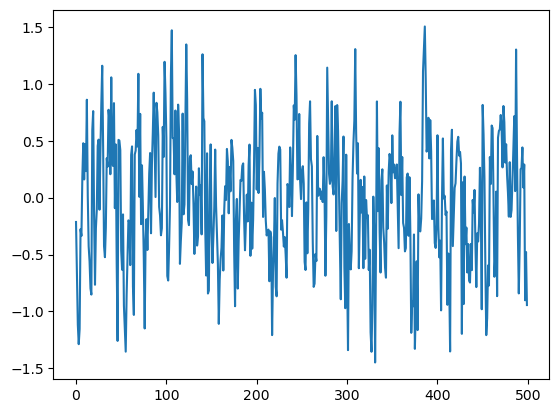

In [7]:
ar_data = list(ar_data)
plt.plot(ar_data)

たぶん$\phi_1 = \sigma^2 \theta$

In [ ]:
#takes time
opt = CLE(ar_data)
theta_hat = opt.x
phi_hat = (sigma**2)*theta_hat
print(f"推定値:{phi_hat}, 実際の値:{phi1}")


KeyboardInterrupt: 

# How to sample from mininfo markov kernel?

$$p(y|x) = \exp{(h(x,y) + \kappa(y) - \kappa(x) - \delta(y))}$$

$$\int p(y|x)r(x)dx = r(y)$$

In [16]:
from scipy.stats import norm, multivariate_normal
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
mu = 0
sigma = 1
r = norm.rvs(loc=mu, scale=sigma, size=1000)
r = np.array([r]).T
r.shape

(1000, 1)

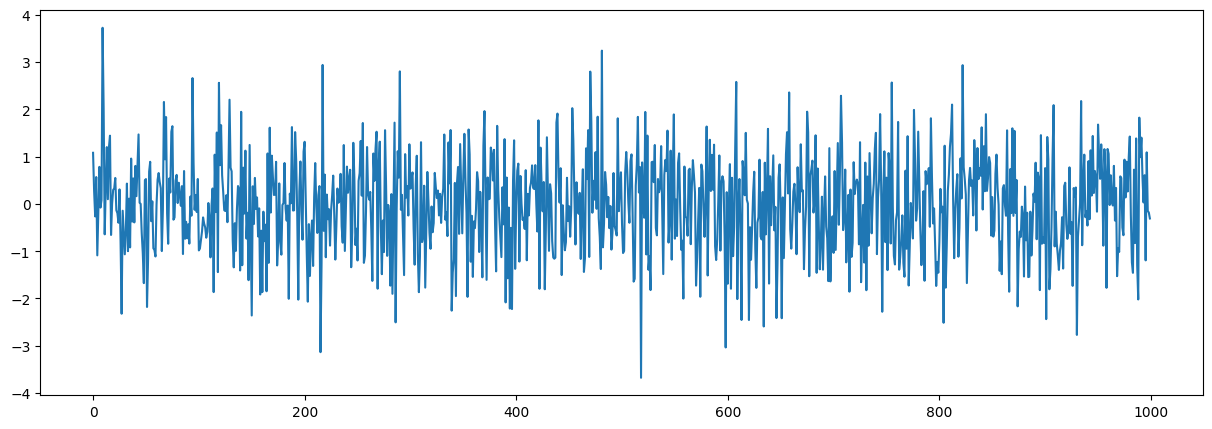

In [19]:
plt.figure(figsize=(15,5))
plt.plot(r)

(array([  3.,  15.,  68., 162., 263., 279., 146.,  52.,  10.,   2.]),
 array([-3.67710857, -2.93721216, -2.19731576, -1.45741935, -0.71752294,
         0.02237347,  0.76226988,  1.50216629,  2.2420627 ,  2.9819591 ,
         3.72185551]),
 <BarContainer object of 10 artists>)

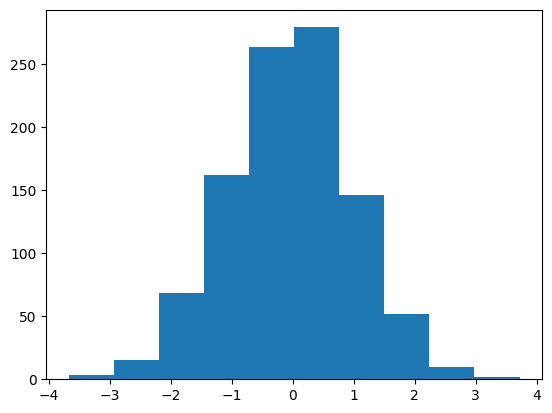

In [20]:
plt.hist(r)

In [21]:
from exchange import exchange_var
from utils import raw_to_dfs

In [22]:
config = {
    "model": None,
    "order": 1,
    "dim": 1,
    "phi": [
        [
            [
                0.5,
            ]
        ]
    ],
    "sigma": [
        [
            0.5
        ],
    ],
    "mean": [
        0,
    ],
    "steps": 1000,
    "run": 30
}

In [23]:
dfs = raw_to_dfs(r,dim=config["dim"],order=config["order"])

In [24]:
phi = np.array([[0.1]]).T
perm, _, _, _ = exchange_var(dfs,r,10000,phi,config)

1 samples accepted ... continue
2 samples accepted ... continue
3 samples accepted ... continue
4 samples accepted ... continue
5 samples accepted ... continue
6 samples accepted ... continue
7 samples accepted ... continue
8 samples accepted ... continue
9 samples accepted ... continue
10 samples accepted ... continue
11 samples accepted ... continue
12 samples accepted ... continue
13 samples accepted ... continue
14 samples accepted ... continue
15 samples accepted ... continue
16 samples accepted ... continue
17 samples accepted ... continue
18 samples accepted ... continue
19 samples accepted ... continue
20 samples accepted ... continue
21 samples accepted ... continue
22 samples accepted ... continue
23 samples accepted ... continue
24 samples accepted ... continue
25 samples accepted ... continue
26 samples accepted ... continue
27 samples accepted ... continue
28 samples accepted ... continue
29 samples accepted ... continue
30 samples accepted ... continue
31 samples accepted

In [25]:
for i,j in perm:
    r[i], r[j] = r[j], r[i]

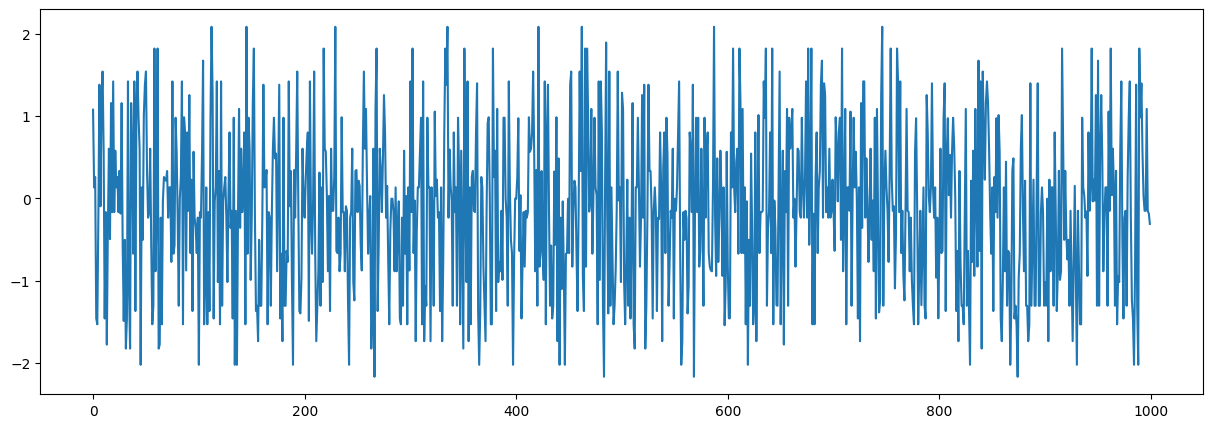

In [27]:
plt.figure(figsize=(15,5))
plt.plot(r)